# Question number 1 

### Part A

The system of differential equations is:

$\frac{dx}{dt} = 4x + 2y$

$\frac{dy}{dt} = -x + y$



We can extract matrix A :

$$
\left(\begin{array}{cc} 
4 & 2\\ 
-1 & 1
\end{array}\right)
$$ 


<img src="./1.jpg" alt="drawing" width="500"/>

In [7]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.polynomial.polynomial import Polynomial

In [8]:
# Define matrix A
A = np.array([[4, 2], [-1, 1]])

### Eigenvalues and Eigenvectors (Part b)


In [9]:
# Calculate eigenvalues & eigenvectors -- based on :  https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(A)

# results
eigenvalues, eigenvectors

(array([3., 2.]),
 array([[ 0.89442719, -0.70710678],
        [-0.4472136 ,  0.70710678]]))

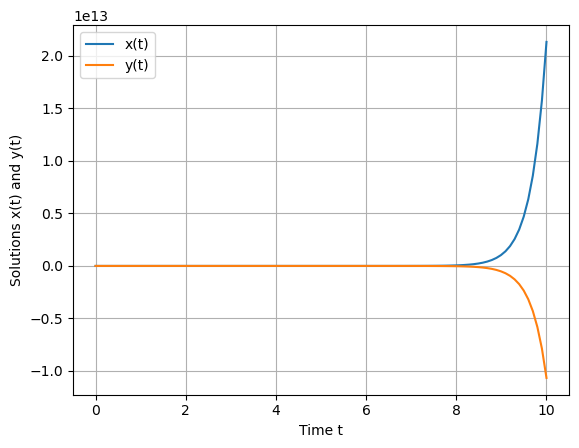

In [10]:
# Define the system of ODEs
def system(t, x):
    return A @ x

# Initial conditions (for example)
X0 = [1, 0]  

# Time span
t_span = [0, 10]  # From t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the system of ODEs
solution = solve_ivp(system, t_span, X0, t_eval=t_eval)

# Plotting the solution
plt.plot(solution.t, solution.y[0], label='x(t)')
plt.plot(solution.t, solution.y[1], label='y(t)')
plt.xlabel('Time t')
plt.ylabel('Solutions x(t) and y(t)')
plt.legend()
plt.grid(True)
plt.show()

# 2:


In this section, we will load a dataset containing temperature and output values. We will then define three different models (linear, quadratic, and cubic) to fit the data. After fitting the models, we will calculate the Root Mean Square Error (RMSE) for each model to evaluate their performance. Finally, we will print the parameters and RMSE values for each model.

### Part a


Linear model parameters (a, b): [  9.17003926 -25.15946844]
Linear model RMSE: 12.440557179317823

Quadratic model parameters (a, b, c): [-2.91440456e-02  1.04523773e+01 -3.47770035e+01]
Quadratic model RMSE: 11.77618759307873

Cubic model parameters (a, b, c, d): [-0.0077926   0.48516786  1.29606688  0.71051779]
Cubic model RMSE: 1.61889022172218


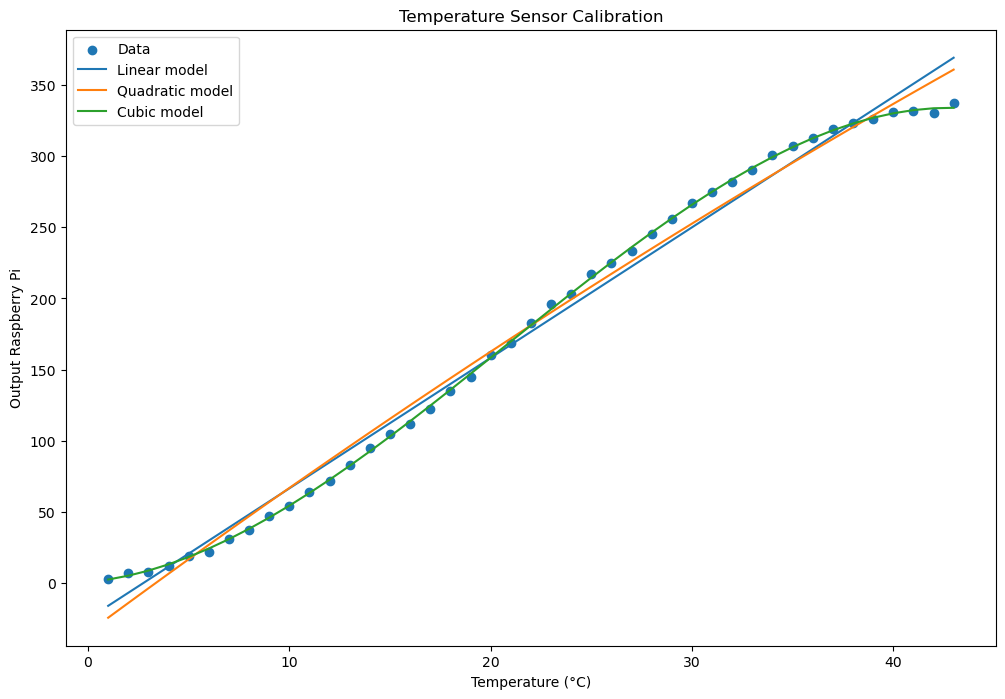

In [11]:
# Load the dataset 
data = pd.read_csv('./dataset.csv')

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


# Extract the independent (Temperature) and dependent (Output) variables
X = data['Temperature (degree Celsius)'].values
y = data['Output Raspberry Pie'].values

def linear_model(x, a, b):
    return a * x + b

def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

def cubic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def fit_model(model, x, y):
    popt, _ = optimize.curve_fit(model, x, y)
    return popt

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Fit models
linear_params = fit_model(linear_model, X, y)
quadratic_params = fit_model(quadratic_model, X, y)
cubic_params = fit_model(cubic_model, X, y)

# Calculate RMSE for each model
linear_rmse = calculate_rmse(y, linear_model(X, *linear_params))
quadratic_rmse = calculate_rmse(y, quadratic_model(X, *quadratic_params))
cubic_rmse = calculate_rmse(y, cubic_model(X, *cubic_params))

# Print results
print("Linear model parameters (a, b):", linear_params)
print("Linear model RMSE:", linear_rmse)
print("\nQuadratic model parameters (a, b, c):", quadratic_params)
print("Quadratic model RMSE:", quadratic_rmse)
print("\nCubic model parameters (a, b, c, d):", cubic_params)
print("Cubic model RMSE:", cubic_rmse)

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data')
plt.plot(X, linear_model(X, *linear_params), label='Linear model')
plt.plot(X, quadratic_model(X, *quadratic_params), label='Quadratic model')
plt.plot(X, cubic_model(X, *cubic_params), label='Cubic model')
plt.xlabel('Temperature (°C)')
plt.ylabel('Output Raspberry Pi')
plt.legend()
plt.title('Temperature Sensor Calibration')
plt.show()

1. Model Performance:
   - Linear model RMSE: 12.44
   - Quadratic model RMSE: 11.78
   - Cubic model RMSE: 1.62

Based on these RMSE values, we can see that:

1. The linear model performs the worst, with the highest RMSE of 12.44.
2. The quadratic model shows a slight improvement over the linear model, with an RMSE of 11.78.
3. The cubic model significantly outperforms both the linear and quadratic models, with a much lower RMSE of 1.62.

my recommendation to use the cubic model for this temperature sensor.

based on the provided RMSE values, the cubic model offers a substantially better fit for this temperature sensor data within its operational range. The significant improvement in accuracy outweighs the slight increase in complexity, making it the recommended choice. However, be mindful of its limitations, especially when extrapolating beyond the measured temperature range.

# 3

### Step 1 & 2


<img src="./3.step1-2.jpg" alt="drawing" width="500"/>

### Step 3 & 4

<img src="./3.step3-4.jpg" alt="drawing" width="500"/>

### Step 5

<img src="./3.step5.jpg" alt="drawing" width="500"/>

### Step 6
<img src="./3.step6.jpg" alt="drawing" width="500"/>


# 4

### Part (a): Load Image, Perform SVD, Reconstruct Images, and Display Compression Ratios & Errors

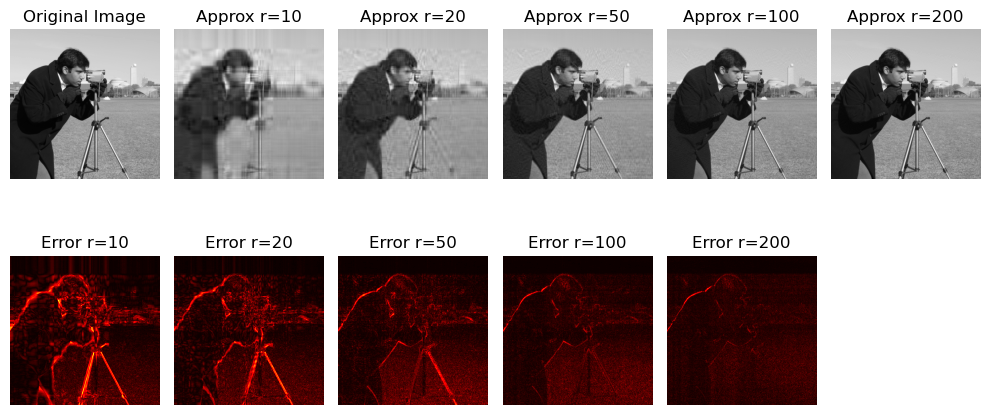

r values, Compression Ratios, Reconstruction Errors
[(10, 0.03910064697265625, 402.56090060873424), (20, 0.0782012939453125, 226.16806333375672), (50, 0.19550323486328125, 89.21647064842597), (100, 0.3910064697265625, 34.15270998095206), (200, 0.782012939453125, 6.873800386626632)]


In [16]:
from skimage.data import camera
from skimage.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the sample image
gray_image = camera()

# Perform Singular Value Decomposition
U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

# Function to calculate compression ratio
def compression_ratio(r, original_shape):
    num_values_original = original_shape[0] * original_shape[1]
    num_values_used = r * (U.shape[0] + Vt.shape[0] + 1)
    return num_values_used / num_values_original

# Define different values of r
r_values = [10, 20, 50, 100, 200]
approximations = []
compression_ratios = []
errors = []

# Reconstruct images for each value of r
for r in r_values:
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    Vtr = Vt[:r, :]
    
    # Reconstruct the image using r singular values
    approx_image = Ur @ Sr @ Vtr
    approximations.append(approx_image)
    
    # Calculate compression ratio
    ratio = compression_ratio(r, gray_image.shape)
    compression_ratios.append(ratio)
    
    # Calculate the reconstruction error (how much detail we lose)
    error = mean_squared_error(gray_image, approx_image)
    errors.append(error)

# Plot original image and approximated images for different r values
plt.figure(figsize=(10, 5))
plt.subplot(2, len(r_values) + 1, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot approximations and error images
for i, (r, approx_image) in enumerate(zip(r_values, approximations)):
    plt.subplot(2, len(r_values) + 1, i + 2)
    plt.imshow(approx_image, cmap='gray')
    plt.title(f'Approx r={r}')
    plt.axis('off')

    plt.subplot(2, len(r_values) + 1, i + len(r_values) + 2)
    plt.imshow(np.abs(gray_image - approx_image), cmap='hot')
    plt.title(f'Error r={r}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Display compression ratios and errors
print("r values, Compression Ratios, Reconstruction Errors")
print(list(zip(r_values, compression_ratios, errors)))


# Part (b) - Choosing a good r for face recognition

To recognize a face, we need enough detail so that key features like the eyes, nose, and mouth are clear.
From the experiment above, r=100 seems reasonable because the image quality is still pretty good.

#### For face recognition, a good r value would be: 100


# Part (c) - Choosing r for recognizing light and dark spots
For just identifying dark and bright areas, we don't need much detail. 
Even r=20 seems good enough to see these broad contrasts.

#### For recognizing dark and bright spots, a suitable r value would be: 20


# Part (d) - Choosing r for recognizing shapes and forms
If we need to identify large shapes like cars or people, we don't need as much fine detail.
Something like r=50 is usually sufficient to capture these broader shapes.

#### For recognizing general forms, a suitable r value would be: 50
